In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
#Be sure of pyproj
import pyproj
print(pyproj.datadir.get_data_dir())

/usr/local/lib/python3.11/dist-packages/pyproj/proj_dir/share/proj


In [ ]:
import osmnx as ox
import os
os.environ["PROJ_LIB"] = "D:/anaconda3/envs/autogis/Library/share/proj"
import geopandas as gpd
from shapely.geometry import box

# Bounding box for Monastir, Tunisia
bounds = [10.75, 35.75, 10.85, 35.80]

# Create a bounding box Polygon
bbox = box(*bounds)

# Retrieve buildings from the given area
buildings = ox.features_from_polygon(bbox, tags={"building": True})

# Optional: display first rows
print(buildings.head())


                                                              geometry  \
element  id                                                              
node     2306912170                          POINT (10.82195 35.76851)   
         2934264958                          POINT (10.81497 35.77913)   
         2934281729                          POINT (10.81436 35.77575)   
         2934324459                          POINT (10.82419 35.76375)   
relation 1388014     POLYGON ((10.83292 35.77659, 10.83296 35.77659...   

                      building  \
element  id                      
node     2306912170        yes   
         2934264958     school   
         2934281729     school   
         2934324459  dormitory   
relation 1388014           yes   

                                                                  name  \
element  id                                                              
node     2306912170                                     المركب الثقافي   
         2934264958 

In [ ]:
buildings.head()

geometry  \
element  id                                                              
node     2306912170                          POINT (10.82195 35.76851)   
         2934264958                          POINT (10.81497 35.77913)   
         2934281729                          POINT (10.81436 35.77575)   
         2934324459                          POINT (10.82419 35.76375)   
relation 1388014     POLYGON ((10.83292 35.77659, 10.83296 35.77659...   

                      building  \
element  id                      
node     2306912170        yes   
         2934264958     school   
         2934281729     school   
         2934324459  dormitory   
relation 1388014           yes   

                                                                  name  \
element  id                                                              
node     2306912170                                     المركب الثقافي   
         2934264958                             Ecole Primaire Esswani   
         2934281729  Centre sectoriel de formation aux métiers du bois   
         2934324459                      Foyer universitaire Bassatine   
relation 1388014                                                   NaN   

                               name:fr addr:city alt_name alt_name:ar  \
element  id                                                             
node     2306912170  Complexe Culturel       NaN      NaN         NaN   
         2934264958                NaN       NaN      NaN         NaN   
         2934281729                NaN       NaN      NaN         NaN   
         2934324459                NaN       NaN      NaN         NaN   
relation 1388014                   NaN       NaN      NaN         NaN   

                    operator operator:ar operator:website  ... addr:street:fr  \
element  id                                                ...                  
node     2306912170      NaN         NaN              NaN  ...            NaN   
         2934264958      NaN         NaN              NaN  ...            NaN   
         2934281729      NaN         NaN              NaN  ...            NaN   
         2934324459      NaN         NaN              NaN  ...            NaN   
relation 1388014         NaN         NaN              NaN  ...            NaN   

                    cuisine architect height house rooms shelter_type  bus  \
element  id                                                                  
node     2306912170     NaN       NaN    NaN   NaN   NaN          NaN  NaN   
         2934264958     NaN       NaN    NaN   NaN   NaN          NaN  NaN   
         2934281729     NaN       NaN    NaN   NaN   NaN          NaN  NaN   
         2934324459     NaN       NaN    NaN   NaN   NaN          NaN  NaN   
relation 1388014        NaN       NaN    NaN   NaN   NaN          NaN  NaN   

                    public_transport          type  
element  id                                         
node     2306912170              NaN           NaN  
         2934264958              NaN           NaN  
         2934281729              NaN           NaN  
         2934324459              NaN           NaN  
relation 1388014                 NaN  multipolygon  

[5 rows x 81 columns]

In [ ]:
len(buildings)

499

<Axes: >

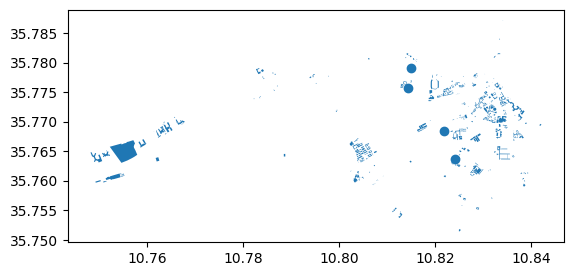

In [ ]:
import pyogrio; pyogrio.list_drivers()
buildings.plot()
#buildings.to_file("buildings.shp")

In [ ]:
#Change projection

In [ ]:
projected = buildings.to_crs(epsg=3067)
projected.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
orig_geom = buildings.iloc[4]["geometry"]
projected_geom = projected.iloc[4]["geometry"]

print("Orig:\n", orig_geom, "\n")
print("Proj:\n", projected_geom)

Orig:
 POLYGON ((10.83292 35.7765882, 10.8329571 35.7765938, 10.8329942 35.7765769, 10.8330846 35.7766201, 10.8331936 35.7764998, 10.8330816 35.7764421, 10.833171 35.7763126, 10.8331861 35.7763202, 10.8332317 35.7762683, 10.8331998 35.7762441, 10.8332672 35.7761796, 10.833294 35.7761962, 10.833341 35.7761415, 10.8333198 35.776126, 10.8333849 35.7760526, 10.8333986 35.7760545, 10.8334219 35.7760467, 10.8334325 35.7760252, 10.8334247 35.7760032, 10.8333995 35.7759912, 10.8333748 35.7759963, 10.8333664 35.7760047, 10.8332535 35.7759319, 10.8332693 35.7759156, 10.8332105 35.7758758, 10.8332276 35.7758592, 10.8331935 35.7758369, 10.8331371 35.7757999, 10.8331197 35.7758192, 10.833062 35.7757805, 10.8330383 35.7758068, 10.832939 35.7757391, 10.832947 35.7757185, 10.8329344 35.7757037, 10.8329168 35.7757, 10.8328999 35.7757061, 10.8328922 35.775721, 10.8329011 35.7757381, 10.8328766 35.7757631, 10.8328649 35.7757569, 10.8328474 35.7757748, 10.832834 35.7757672, 10.8328213 35.7757806, 10.83283

In [ ]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

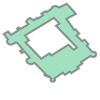

In [ ]:
orig_geom

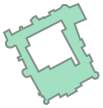

In [ ]:
projected_geom

In [ ]:
type(orig_geom)

shapely.geometry.polygon.Polygon

In [ ]:
#Building Areas

In [ ]:
projected["building_area"] = projected.area
projected["building_area"].describe()

,building_area
count,499.000000
mean,1140.111266
std,6179.831618
min,0.000000
25%,131.931398
50%,285.325945
75%,862.043734
max,132714.057352


In [ ]:
# Preparing Spatial Join

<Axes: >

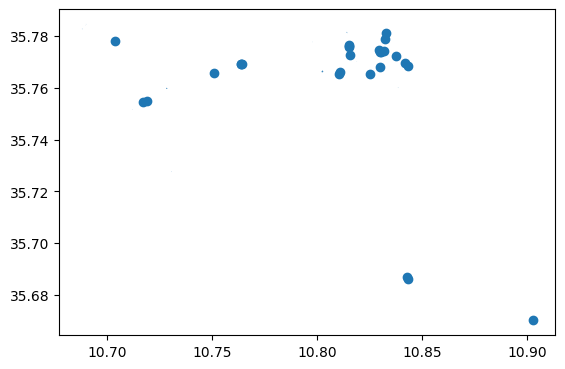

In [ ]:
query = "Monastir, Tunisia"
restaurants = ox.features_from_place(query, tags={"amenity": ["restaurant", "bar", "pub"]})
restaurants.plot()

In [ ]:
restaurants.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 44 entries, ('node', np.int64(567356051)) to ('way', np.int64(1061089437))
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geometry            44 non-null     geometry
 1   access              4 non-null      object  
 2   addr:city           11 non-null     object  
 3   amenity             44 non-null     object  
 4   name                36 non-null     object  
 5   name:ar             11 non-null     object  
 6   name:fr             10 non-null     object  
 7   operator            4 non-null      object  
 8   name:en             4 non-null      object  
 9   opening_hours       2 non-null      object  
 10  indoor_seating      5 non-null      object  
 11  outdoor_seating     5 non-null      object  
 12  cuisine             14 non-null     object  
 13  internet_access     1 non-null      object  
 14  addr:city:ar        3 non-nul

In [ ]:
#Seek Fetch Building

In [ ]:
query = "Monastir, Tunisia"
hki_buildings = ox.features_from_place(query, tags={"building": True})
hki_buildings.shape

(10490, 128)

<Axes: >

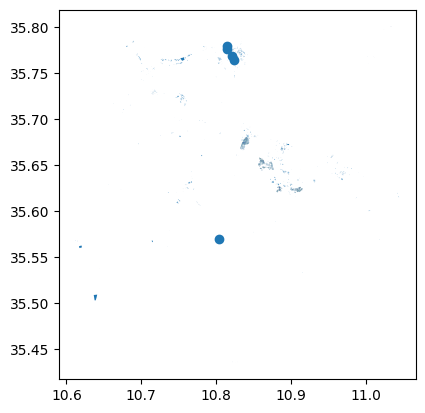

In [ ]:
hki_buildings.plot()

In [ ]:
#Clean the misrepresented data and extra data

In [ ]:
hki_buildings = hki_buildings.loc[["way", "relation"]].copy()

In [ ]:
#Plot clean

<Axes: >

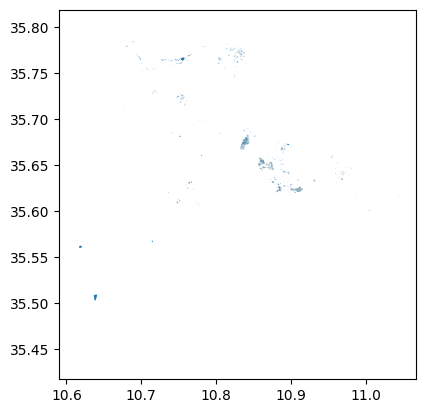

In [ ]:
hki_buildings.plot()

In [ ]:
#Going for Spatial Join

In [ ]:
# Join information from buildings to restaurants
join = gpd.sjoin(restaurants, hki_buildings)

# Print column names
join.columns

Index(['geometry', 'access_left', 'addr:city_left', 'amenity_left',
       'name_left', 'name:ar_left', 'name:fr_left', 'operator_left',
       'name:en_left', 'opening_hours_left',
       ...
       'landuse', 'payment:cash', 'diet:halal_right', 'architect', 'height',
       'house', 'rooms', 'bus', 'type', 'fax'],
      dtype='object', length=159)

In [ ]:
pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 6.9 MB/s eta 0:00:00


<Axes: >

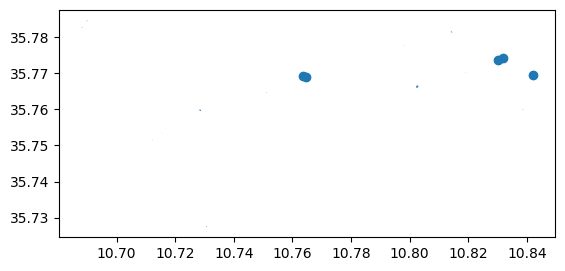

In [ ]:
join.plot()

In [ ]:
import osmnx as ox

query = "Ksar Hellal, Monastir, Tunisia"
borders = ox.features_from_place(query, tags={"admin_level": "6"})  # ← ou 6
borders.explore()


In [ ]:
#Filter data to focus only on desired region

In [ ]:
borders.head()

,,type,admin_level,boundary,name,geometry
element,id,,,,,
relation,17504382,boundary,10,administrative,Microcentro,"POLYGON ((-57.95523 -34.91148, -57.95509 -34.9..."


In [ ]:
# Sélectionner uniquement la ligne correspondant à "Ksar Hellal"
borders = borders.loc[borders["name"] == "Ksar Hellal"]

# Afficher la zone sélectionnée sur une carte interactive
borders.explore()


<ipython-input-32-646fb342bcc6>:5: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  borders.explore()


In [ ]:
#Select data using the sjoin

<Axes: >

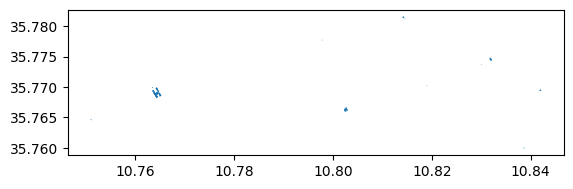

In [ ]:
join2 = gpd.sjoin(buildings, restaurants, how="inner", predicate="intersects")
join2.plot()

In [ ]:
#Call matplotlib

Index(['geometry', 'building_left', 'name_left', 'name:fr_left',
       'addr:city_left', 'alt_name', 'alt_name:ar', 'operator_left',
       'operator:ar', 'operator:website',
       ...
       'toilets', 'toilets:wheelchair', 'wheelchair_right', 'survey:date',
       'takeaway', 'toilets:access', 'addr:street_right', 'phone_right',
       'building_right', 'source_right'],
      dtype='object', length=112)

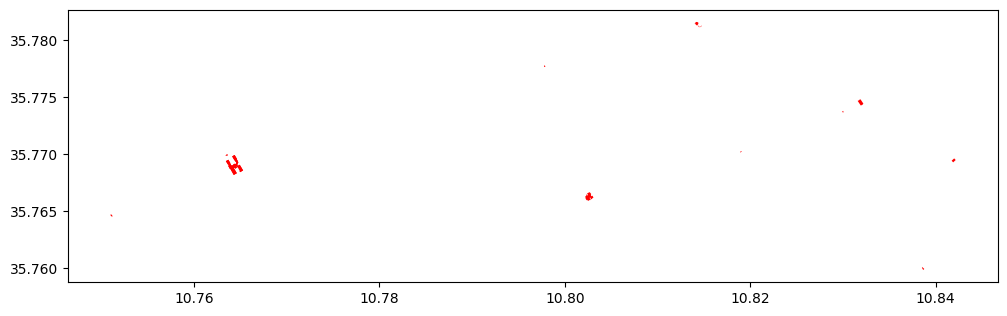

In [ ]:
ax = join2.plot(facecolor="red", figsize=(12,12))
join2.columns

In [ ]:
#Color using building type, add legend

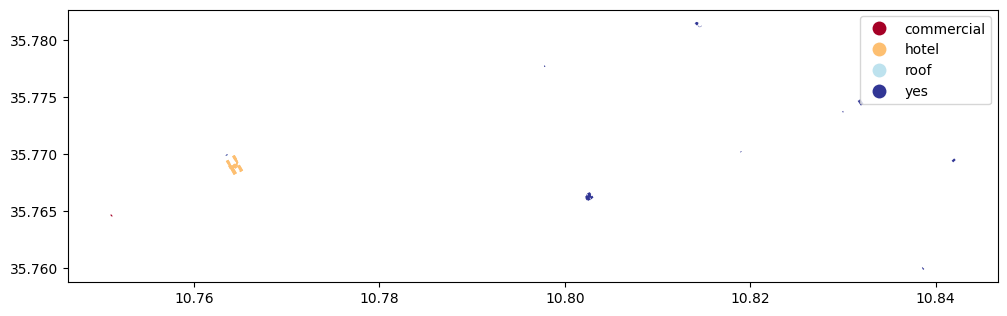

In [ ]:
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

In [ ]:
#Add streets

In [ ]:
 # Get roads (retrieves walkable roads by default)
G = ox.graph_from_polygon(bbox)

In [ ]:
# Parse roads from the graph
roads = ox.graph_to_gdfs(G, nodes=False, edges=True)

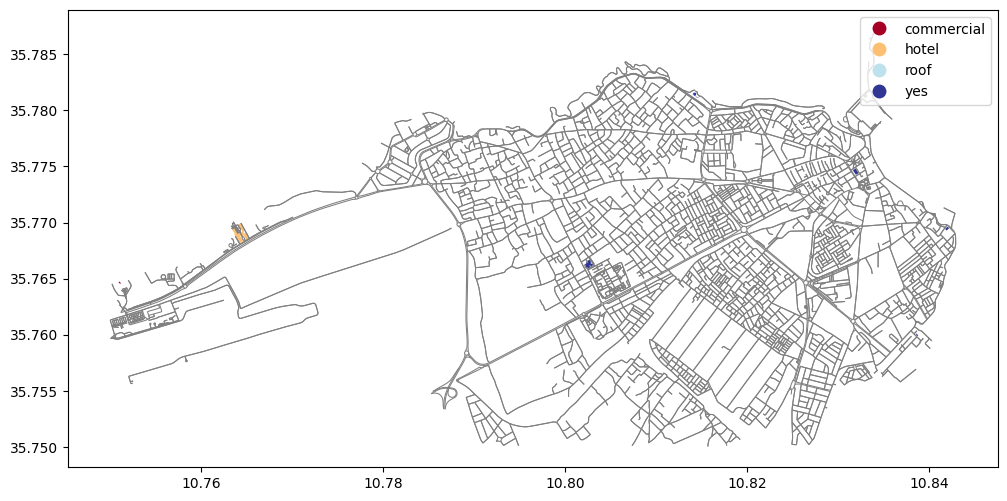

In [ ]:
# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)

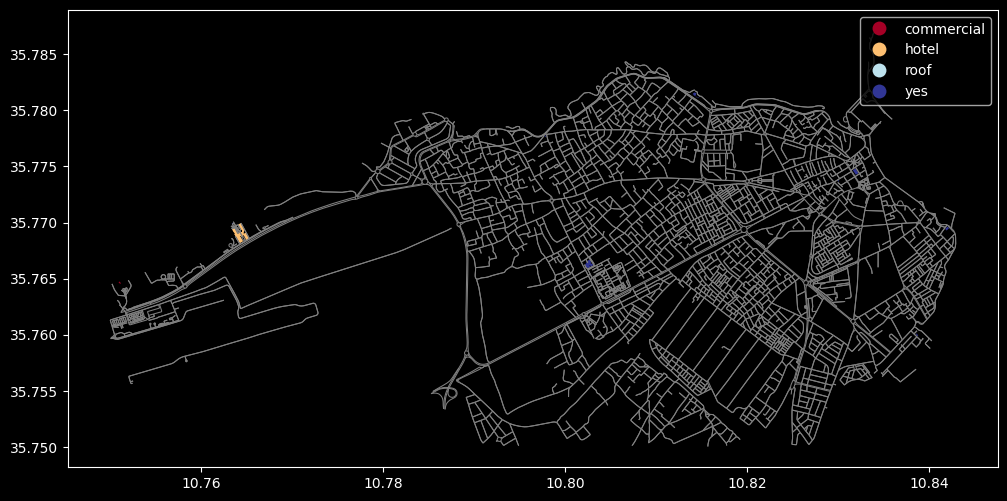

In [ ]:
# Import matplotlib pyplot and use a dark_background theme
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Plot the map again
ax = join2.plot(column="building_left", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)

In [41]:
# Sauvegarde en GeoJSON
buildings.to_file("buildings.geojson", driver='GeoJSON')